In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime


In [2]:
# Files to Load 
cityDataCSV = "data/city_data.csv"
rideDataCSV = "data/ride_data.csv"

In [3]:
# Read the City and Ride Data
dfCity = pd.read_csv(cityDataCSV)
dfRide = pd.read_csv(rideDataCSV)

In [4]:
dfCity.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [5]:
dfRide.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [6]:
#first convert the string to a datatype
dfRide["date"] = pd.to_datetime(dfRide["date"])

dfRide['new_date'] = [d.date() for d in dfRide['date']]
dfRide['new_time'] = [d.time() for d in dfRide['date']]

In [7]:
dfRide.head()

,city,date,fare,ride_id,new_date,new_time
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,2018-01-14,10:14:22
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,2018-03-04,18:24:09
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,2018-02-24,04:29:00
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,2018-02-10,23:22:03
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,2018-03-06,04:28:35


In [8]:
dfRide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 6 columns):
city        2375 non-null object
date        2375 non-null datetime64[ns]
fare        2375 non-null float64
ride_id     2375 non-null int64
new_date    2375 non-null object
new_time    2375 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 111.4+ KB


In [9]:
dfCity.count()

city            120
driver_count    120
type            120
dtype: int64

In [10]:
dfRide.count()

city        2375
date        2375
fare        2375
ride_id     2375
new_date    2375
new_time    2375
dtype: int64

In [11]:
# Merge two dataframes using a full join
#Should only need a left merge.  Chose full in the event there was a city with no driver data.
dfMerge = pd.merge(dfRide, dfCity, how="outer", on="city")
dfMerge.head()

,city,date,fare,ride_id,new_date,new_time,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,2018-01-14,10:14:22,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,2018-04-07,20:51:11,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,2018-03-09,23:45:55,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,2018-04-07,18:09:21,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,2018-01-02,14:14:50,5,Urban


In [12]:
dfMerge.count()
#confirm the total count is 2375.  If greater, there was a city without a record in the driver table.

city            2375
date            2375
fare            2375
ride_id         2375
new_date        2375
new_time        2375
driver_count    2375
type            2375
dtype: int64

In [13]:
dfMerge.head()

,city,date,fare,ride_id,new_date,new_time,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,2018-01-14,10:14:22,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,2018-04-07,20:51:11,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,2018-03-09,23:45:55,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,2018-04-07,18:09:21,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,2018-01-02,14:14:50,5,Urban


In [14]:
#Come back to this.   
#date = datetime.datetime.strptime(dfMerge["date"], "%d %b %Y  %H:%M:%S.%f")


In [15]:
#dfMerge["dateOnly"] = datetime.datetime.strptime(dfMerge["date"], "%Y %b %d")

#### Part A - Create a dataframe with the data needed.
* Step 1, Create a dataframe with the city, average fare, and total number of rides.
* Step 2, Perfrom a merge to get the city type

In [16]:
# Obtain the x and y coordinates for each of the three city types
urban_cities = dfMerge[dfMerge["type"] == "Urban"]
suburban_cities = dfMerge[dfMerge["type"] == "Suburban"]
rural_cities = dfMerge[dfMerge["type"] == "Rural"]

urban_ride_count = urban_cities.groupby(["city"]).count()["ride_id"]
urban_avg_fare = urban_cities.groupby(["city"]).mean()["fare"]
urban_driver_count = urban_cities.groupby(["city"]).mean()["driver_count"]

suburban_ride_count = suburban_cities.groupby(["city"]).count()["ride_id"]
suburban_avg_fare = suburban_cities.groupby(["city"]).mean()["fare"]
suburban_driver_count = suburban_cities.groupby(["city"]).mean()["driver_count"]

rural_ride_count = rural_cities.groupby(["city"]).count()["ride_id"]
rural_avg_fare = rural_cities.groupby(["city"]).mean()["fare"]
rural_driver_count = rural_cities.groupby(["city"]).mean()["driver_count"]

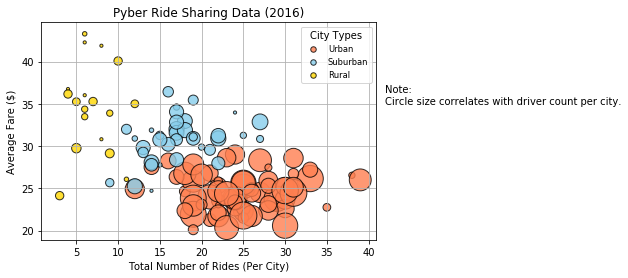

In [17]:
# Build the scatter plots for each city types
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s=10*urban_driver_count, c="coral", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            s=10*suburban_driver_count, c="skyblue", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            s=10*rural_driver_count, c="gold", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="best", title="City Types", 
                  labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(42, 35, "Note:\nCircle size correlates with driver count per city.")

#
#plt.tight_layout()

# Save Figure
plt.savefig("Fig1.png")
plt.savefig("myfile.png", bbox_inches = "tight")

# Show plot
plt.show()

### Part B - Create the Scatter Chart
*Step 1 create a scatter chart for the urban drivers 
<br>X axis is the average fare and y axis is the total rides

*Step 2 add the other city types

### Pie Chart

In [18]:
colors = ["Gold", "SkyBlue", "Coral"]

In [ ]:
#Create a dataframe for the total fare by city type
dfFareByCity = dfRideSummaryMerged.groupby("type").agg({"avgFare":'sum'})


In [ ]:
dfFareByCity.head()

In [ ]:
# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0, .5) #higher the number the more the explosion